<a href="https://colab.research.google.com/github/RAWRXD001c/MLB-Baseball/blob/main/Baseball_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOF possible factors: Hits, Home Runs,



HOF maybe factors: Games, Runs Batted In



HOF probably not factors: Years

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('/content/archive.zip', encoding="latin-1")
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp as mc
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection, metrics
import numpy as np

Saving archive.zip to archive.zip


Research Question: What factors let a player enter the Hall of Fame and can we predict which ones will and won't enter the HOF?

In [3]:
renaming = {'G': 'Games', 'AB': 'At Plate', 'R': 'Runs', 'H': 'Hits', '2B': 'Doubles', '3B': 'Triples',
            'RBI': 'Runs Batted In'}
df = df.rename(columns=renaming)
df['HOF'][160]=1

/tmp/ipython-input-3-2553983302.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['HOF'][160]=1
/tmp/ipython-input-3-2553983302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

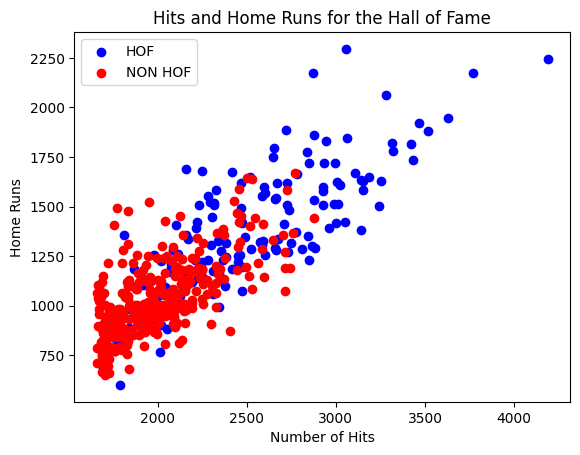

In [ ]:
plt.scatter(df[df['HOF'] == 1]['Hits'], df[df['HOF'] ==1]['Runs'], color = 'blue', label = 'HOF')
plt.scatter(df[df['HOF'] == 0 ]['Hits'], df[df['HOF'] ==0]['Runs'], color = 'red', label = 'NON HOF')
plt.title("Hits and Home Runs for the Hall of Fame")
plt.xlabel("Number of Hits")
plt.ylabel("Home Runs")
plt.legend()

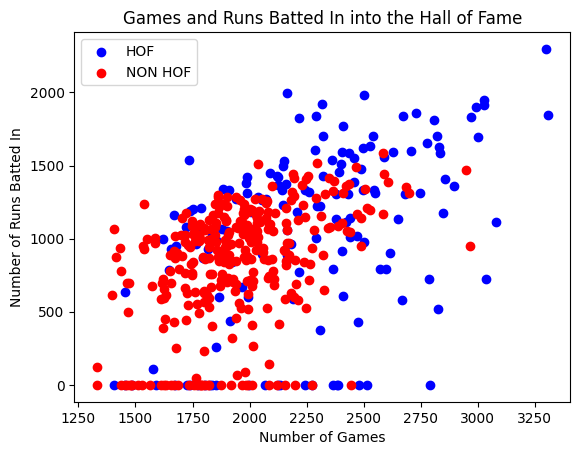

In [ ]:
plt.scatter(df[df['HOF'] == 1]['Games'], df[df['HOF'] ==1]['Runs Batted In'], color = 'blue', label = 'HOF')
plt.scatter(df[df['HOF'] == 0 ]['Games'], df[df['HOF'] ==0]['Runs Batted In'], color = 'red', label = 'NON HOF')
plt.title("Games and Runs Batted In into the Hall of Fame")
plt.xlabel("Number of Games")
plt.ylabel("Number of Runs Batted In")
plt.legend()

Accuracy Score:  0.8387096774193549


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

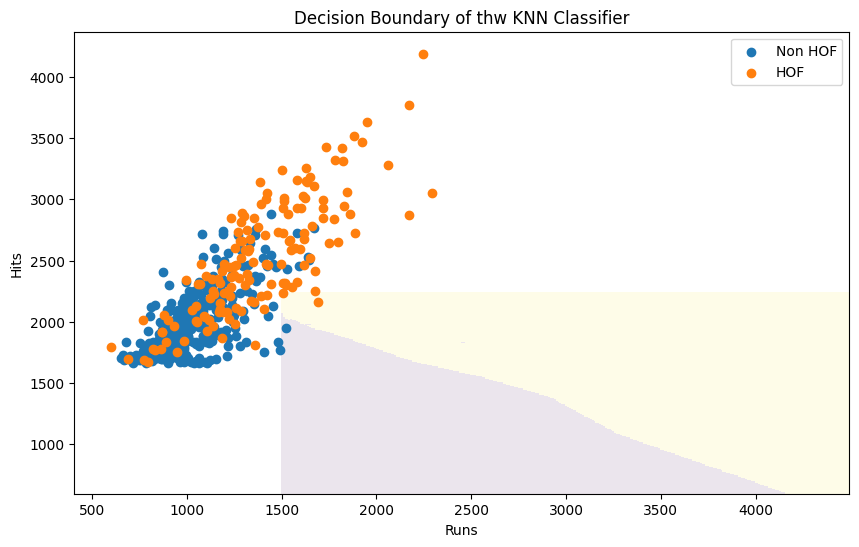

In [5]:
#KNN (Runs and Hits)
features = df[['Runs', 'Hits']]
label = df['HOF']
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test, predict))

#5 0.7956989247311828
#3 0.8064516129032258
#7 0.8172043010752689
#9 0.8279569892473119
#10 0.8387096774193549

#Visual model
fig, ax = plt.subplots(figsize=(10,6))
xx, yy = np.meshgrid(np.arange(1500, 4500, 10), np.arange(600, 2250, 10))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
ax.pcolormesh(xx, yy, z, alpha=0.1)
for label, data in df.groupby("HOF"):
  ax.scatter(data['Runs'], data['Hits'], label = ['Non HOF', 'HOF'][label])
ax.set_title("Decision Boundary of thw KNN Classifier")
ax.set_xlabel("Runs")
ax.set_ylabel("Hits")
ax.legend()
plt.show

In [7]:
#KNN (Games, Runs Batted In)
features = df[['Games', 'Runs Batted In']]
label = df['HOF']
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test, predict))

#5 0.7741935483870968
#3 0.7956989247311828
#7 0.7849462365591398
#9 0.7849462365591398
#10 0.7956989247311828

#Visual model

Accuracy Score:  0.7956989247311828


In [ ]:
#KNN (Years, )
features = df[['Years', '']]
label = df['HOF']
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test, predict))